In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
data=pd.read_csv("IRIS.csv")

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [8]:
data.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [9]:
data.mode()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.0,1.5,0.2,Iris-setosa
1,NaN,NaN,NaN,NaN,Iris-versicolor
2,NaN,NaN,NaN,NaN,Iris-virginica


In [11]:
data.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [12]:
data.shape

(150, 5)

In [13]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [16]:
round(data.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


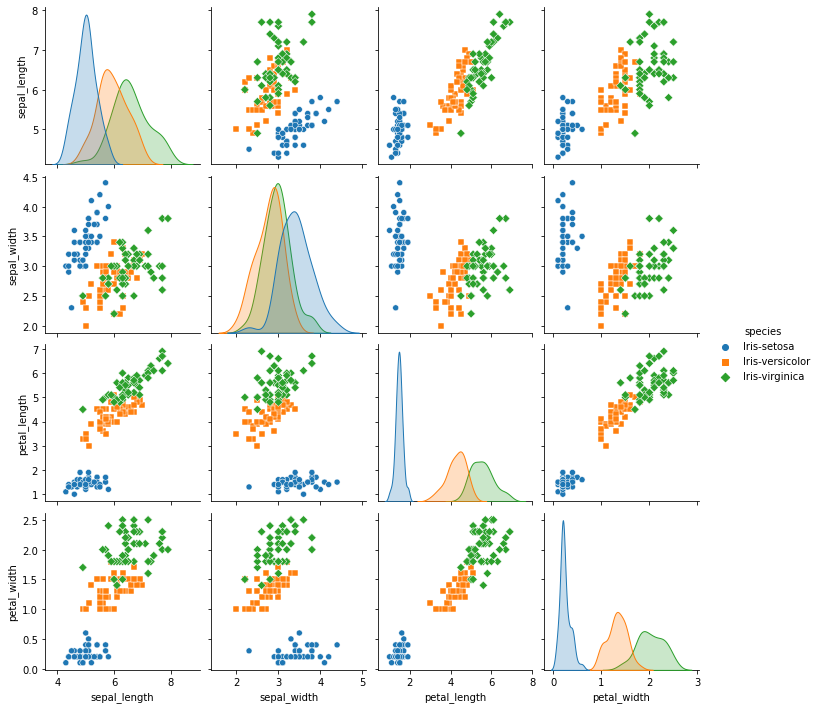

In [24]:
sns.pairplot(data, hue='species', markers=['o', 's', 'D'])
plt.show()

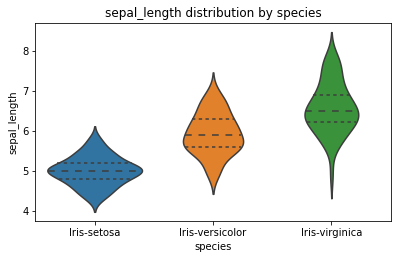

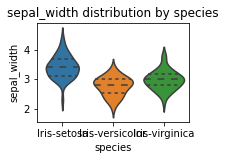

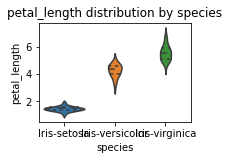

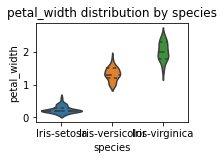

In [26]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=column, data=data, inner='quartile')
    plt.title(f'{column} distribution by species')
    plt.show()

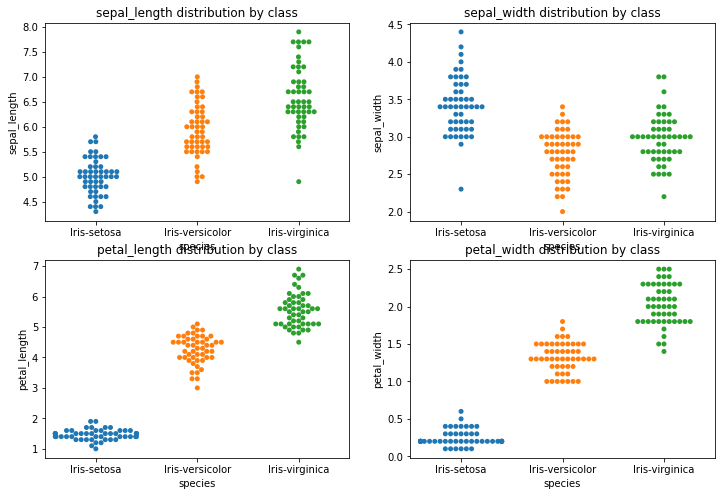

In [28]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.swarmplot(x='species', y=column, data=data)
    plt.title(f'{column} distribution by class')
plt.show()

Text(0, 0.5, 'sepal_length')

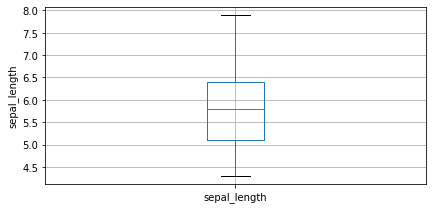

In [29]:
plt.figure(figsize=(15,15))
plt.subplot(4, 2, 1)
fig = data.boxplot(column='sepal_length')
fig.set_title('')
fig.set_ylabel('sepal_length')

Text(0, 0.5, 'sepal_width')

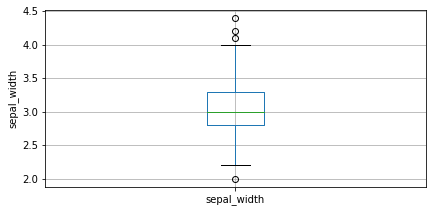

In [33]:
plt.figure(figsize=(15,15))
plt.subplot(4, 2, 2)
fig = data.boxplot(column='sepal_width')
fig.set_title('')
fig.set_ylabel('sepal_width')

Text(0, 0.5, 'petal_length')

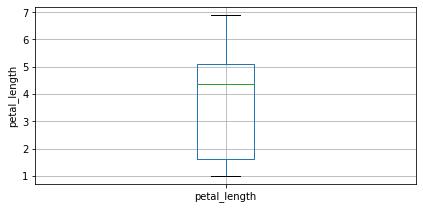

In [34]:
plt.figure(figsize=(15,15))
plt.subplot(4, 2, 3)
fig = data.boxplot(column='petal_length')
fig.set_title('')
fig.set_ylabel('petal_length')

Text(0, 0.5, 'petal_width')

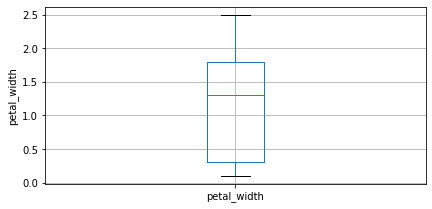

In [35]:
plt.figure(figsize=(15,15))
plt.subplot(4, 2, 4)
fig = data.boxplot(column='petal_width')
fig.set_title('')
fig.set_ylabel('petal_width')

Text(0.5, 0, 'IP Mean')

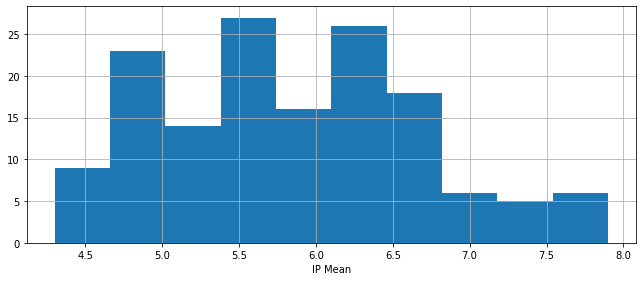

In [36]:
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = data['sepal_length'].hist(bins=10)
fig.set_xlabel('IP Mean')

Text(0.5, 0, 'sepal_width')

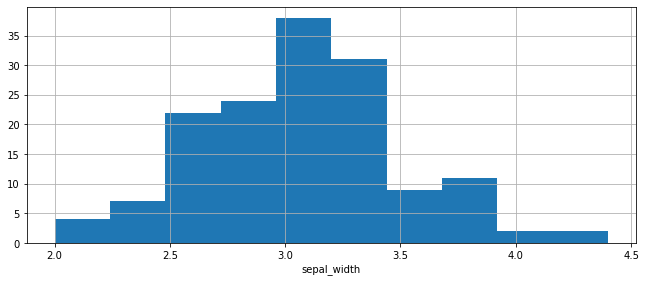

In [38]:
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 2)
fig = data['sepal_width'].hist(bins=10)
fig.set_xlabel('sepal_width')

Text(0.5, 0, 'petal_length')

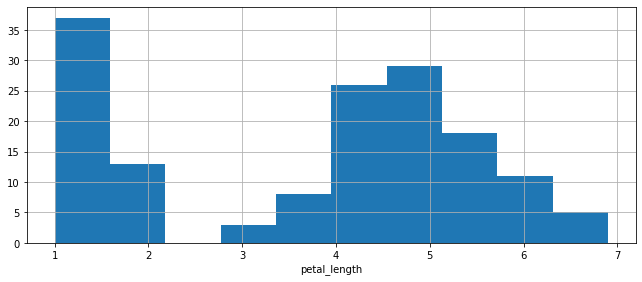

In [39]:
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 3)
fig = data['petal_length'].hist(bins=10)
fig.set_xlabel('petal_length')

Text(0.5, 0, 'petal_width')

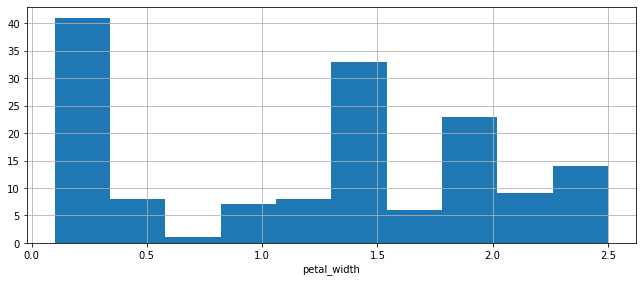

In [41]:
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 4)
fig = data['petal_width'].hist(bins=10)
fig.set_xlabel('petal_width')

In [42]:
X = data.drop(['species'], axis=1)

In [43]:
y = data['species']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [45]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [46]:
cols = X_train.columns

In [47]:
from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [49]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [50]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,2.225622,-1.081372,1.782580,1.442659
1,1.268273,0.056914,0.774818,1.442659
2,-1.005430,0.739886,-1.184721,-1.021208
3,-1.005430,0.967544,-1.184721,-0.761854
4,-0.766093,-0.853715,0.102976,0.275564


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.00


In [52]:
y_pred_train = svc.predict(X_train)
y_pred_train

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iri

In [53]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9732


In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11  0  0]
 [ 0 15  0]
 [ 0  0 12]]

True Positives(TP) =  11

True Negatives(TN) =  15

False Positives(FP) =  0

False Negatives(FN) =  0


<AxesSubplot:>

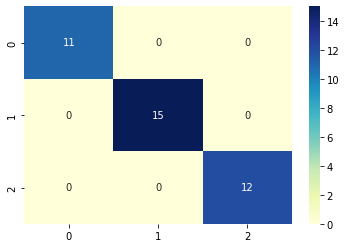

In [55]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [57]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.3f}'.format(classification_accuracy))

Classification accuracy : 1.000


In [58]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [59]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [60]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc=SVC()
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)
print('cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))
print('mean cross-validation scores with linear kernel:\n\n{}'.format(linear_scores.mean()))

cross-validation scores with linear kernel:

[1.         0.8        1.         0.96666667 0.93333333]
mean cross-validation scores with linear kernel:

0.9400000000000001
